In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import v2
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

{'closed': 0, 'equal': 1, 'open': 2}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


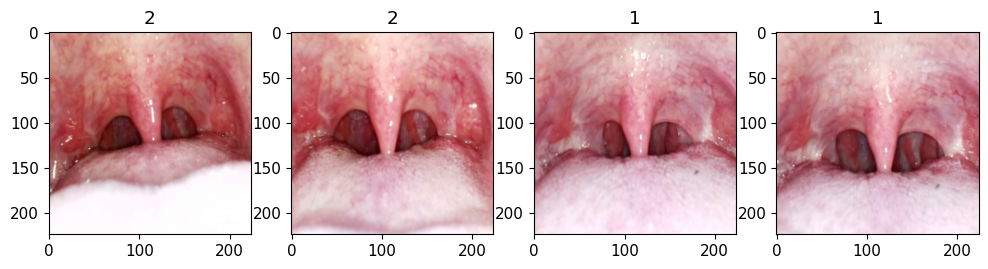

In [72]:
data_dir = "../data/images"

transform = v2.Compose([
    v2.Resize((256, 256)),
    v2.CenterCrop(224),
    v2.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = ImageFolder(data_dir, transform=transform, target_transform=None)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

print(dataset.class_to_idx)

images, labels = next(iter(dataloader))

fig, ax = plt.subplots(figsize=(12,8), ncols=4)
for i in range(4):
    rgb_img = (images[i].permute(1, 2, 0).numpy() * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]))[:,:,::-1]
    ax[i].imshow(rgb_img)
    ax[i].set_title(labels[i].item())
fig

In [73]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to C:\Users\Tim/.cache\torch\hub\v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Tim/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100.0%


In [88]:
num_classes = len(dataset.class_to_idx)
batch_size = 32
learning_rate = 0.001
num_epochs = 1

train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model.train()
for epoch in range(num_epochs):
    for images, labels in tqdm(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

print('Training complete')

100%|██████████| 116/116 [47:32<00:00, 24.59s/it]

Epoch 0, Loss: 0.0390
Training complete


In [90]:
model.eval()
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.2%}')


  0%|          | 0/116 [00:00<?, ?it/s]

100%|██████████| 116/116 [16:28<00:00,  8.52s/it]

Test Accuracy: 66.63%
